In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from Score import ScoreClass
from DataFuncs import DataFuncs
from PlotFunctions import PlotFuncs
sns.set(style="darkgrid", rc={'figure.figsize':(12,8)})

import warnings
warnings.filterwarnings("ignore")

# Enable interactive notebook

In [3]:
%matplotlib notebook

# Main


Load Experiment data. 

In [4]:
DataFuncsObj = DataFuncs()
all_tag_measurements = pd.read_pickle(r'tag_measurements_2020_03_28.pkl')
all_tag_measurements = all_tag_measurements.dropna(how='any').reset_index(drop=True)

# Plots without windowing

In [ ]:
# pd.unique(all_tag_measurements.obstacle)
obstacle = 'No Obstacle'
show_measurements = all_tag_measurements.where(all_tag_measurements.obstacle == obstacle)
show_measurements = show_measurements.dropna(how='any').reset_index(drop=True)

In [ ]:
plt.figure()
ax = sns.boxplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["rssi"], hue =show_measurements["DisplayName"] ).set_title(obstacle + " - All setups")
# plt.figure()
# ax = sns.boxplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["rssi"] ).set_title(obstacle + " - All setups")

boxolot for each setup

In [ ]:
# pd.unique(show_measurements.setup)
for setup in pd.unique(show_measurements.setup):
    setup_measurements = show_measurements.where(show_measurements.setup == setup)
    title_str = str(obstacle) + " - " + str(setup)
    plt.figure()
#     color by display name
#     sns.boxplot(x=np.round(setup_measurements["distance"]*4)/4, y=setup_measurements["rssi"], hue =setup_measurements["DisplayName"]) .set_title(title_str)
#     all devices united
    sns.boxplot(x=np.round(setup_measurements["distance"]*4)/4, y=setup_measurements["rssi"]) .set_title(title_str)
    plt.show()

# Plot window data

In [5]:
win_size_seconds = 90

Choose data to plot

In [ ]:
# choose all data
plot_tag_data = all_tag_measurements

In [ ]:
# exclude specific display names
plot_tag_data = DataFuncsObj.exclude_display_name_from_df(all_tag_measurements,'GalaxyNote4_AZer')

In [6]:
#normalized data 
norm_distance = 1 #m
setup = 'Phone in hand'
plot_tag_data = DataFuncsObj.normalize_by_distance(all_tag_measurements,norm_distance, setup )

GalaxyS7_YDanan:There is no 1m distance, Therefore we use 1.125m to normalize
RedmiNote8_OAvitan:There is no 1m distance, Therefore we use 0.5m to normalize


In [7]:
PlotFuncsObj = PlotFuncs(plot_tag_data, win_size_seconds)

Plot move mean

In [ ]:
# PlotFuncsObj.set_minor_axes_size(1)
PlotFuncsObj.plot_data( 'mean', plot_func='boxplot',obstacle='No Obstacle', plot_hue=0)
fig1 = plt.gcf()
# PlotFuncsObj.set_minor_axes_size(5)
# fig1.savefig("mean_rssi.png")

In [ ]:
PlotFuncsObj.plot_data( 'mean', plot_func='violinplot',obstacle='No Obstacle')
fig1 = plt.gcf()
# fig1.savefig("mean_rssi_violinplot.png")

Plot move median

In [ ]:
PlotFuncsObj.plot_data( 'median', plot_func='boxplot',obstacle='No Obstacle', plot_hue=0)
fig1 = plt.gcf()
fig1.savefig("median_rssi.png")

In [ ]:
PlotFuncsObj.plot_data( 'median', plot_func='violinplot',obstacle='No Obstacle')
fig1 = plt.gcf()
fig1.savefig("median_rssi_violinplot.png")

Plot move variance

In [ ]:
PlotFuncsObj.plot_data( 'var', plot_func='boxplot',obstacle='No Obstacle', plot_hue=1)
fig1 = plt.gcf()
# fig1.savefig("var_rssi.png")

Plot counts

In [ ]:
PlotFuncsObj.plot_data('count', plot_func='boxplot',obstacle='No Obstacle', plot_hue=1)
fig1 = plt.gcf()
# fig1.savefig("count_rssi.png")

In [ ]:
# plot violinplot to show semi distribution
PlotFuncsObj.plot_data( 'count', plot_func='violinplot',obstacle='No Obstacle', plot_hue=0)
fig1 = plt.gcf()
# fig1.savefig("count_rssi_violinplot.png")

Plot wanted percentile 

In [ ]:
wanted_percentile = 90

In [ ]:
# PlotFuncsObj.set_minor_axes_size(1)
PlotFuncsObj.plot_data( 'percentile', plot_func='boxplot',obstacle='No Obstacle',percent=wanted_percentile,plot_hue=0)
fig1 = plt.gcf()
# fig1.savefig("percentile_"+str(wanted_percentile) +"_rssi.png")

In [ ]:
# plot violinplot to show semi distribution
PlotFuncsObj.plot_data( 'percentile', plot_func='violinplot',obstacle='No Obstacle',percent=wanted_percentile,plot_hue=0)
fig1 = plt.gcf()
# fig1.savefig("percentile_"+str(wanted_percentile) +"_rssi_violinplot.png")

Plot above percentile

In [ ]:
wanted_percentile = 90

In [ ]:
PlotFuncsObj.plot_data( 'above_percentile', plot_func='boxplot',obstacle='No Obstacle',percent=wanted_percentile, margin = 0,plot_hue=1)
fig1 = plt.gcf()
# fig1.figure.savefig("above_percentile_"+str(wanted_percentile)+"_rssi.png")

In [ ]:
PlotFuncsObj.plot_data( 'above_percentile', plot_func='violinplot',obstacle='No Obstacle',percent=wanted_percentile, margin = 0,plot_hue=0)
fig1 = plt.gcf()
# fig1.savefig("above_percentile_"+str(wanted_percentile)+"_rssi_violinplot.png")

Plot counts above percentile

In [ ]:
wanted_percentile = 90
margin = 0 

In [ ]:
PlotFuncsObj.plot_data( 'above_percentile_counts', plot_func='boxplot',obstacle='No Obstacle',percent=wanted_percentile, margin = margin,plot_hue=1)
fig1 = plt.gcf()
# fig1.savefig("above_percentile_"+str(wanted_percentile)+"_rssi.png")

Plot difference between percentiles

In [10]:
top_percentile = 80
bottom_percentile = 30

<IPython.core.display.Javascript object>


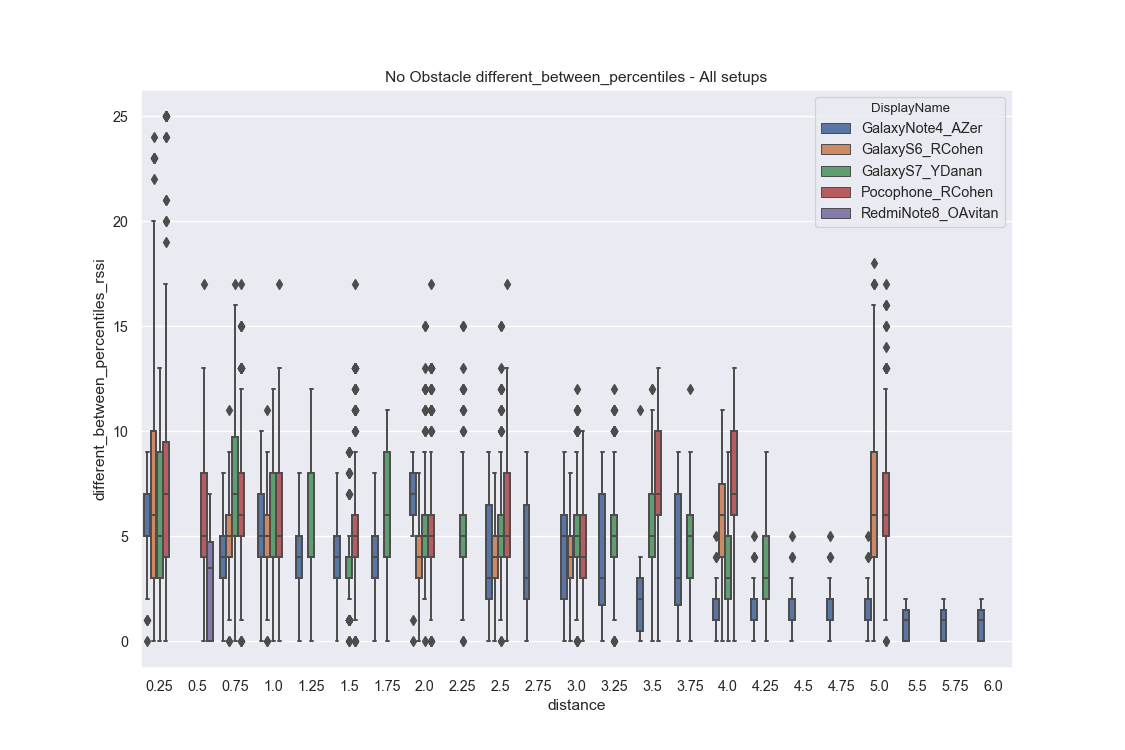

In [11]:
PlotFuncsObj.plot_data( 'different_between_percentiles', plot_func='boxplot',obstacle='No Obstacle',top_percent=top_percentile, bottom_percent = bottom_percentile,plot_hue=1)
fig1 = plt.gcf()
# fig1.savefig("different_between_percentiles_"+str(bottom_percentile)+"to"+str(top_percentile)+"_rssi.png")

# Scores

Normalized

window = 60s; distance - 1.5m ; mean rssi > -7dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 60, 'mean', 1.5, -7)
score_obj.get_all_scores()

window = 60s; distance - 3m ; mean rssi > -8dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 60, 'mean', 3, -8)
score_obj.get_all_scores()

window = 60s; distance - 3.5m ; percentile 90 > -5dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 60, 'percentile', 3.5, -5, percent = 90)
score_obj.get_all_scores()

window = 60s; distance - 2.5m ; percentile 90 > -3dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 60, 'percentile', 2.5, -3, percent = 90)
score_obj.get_all_scores()

window = 30s; distance - 3.5m ; median > -7dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 30, 'median', 3.5, -7)
score_obj.get_all_scores()

window = 30s; distance - 1.75m ; median > -6dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 30, 'median', 1.75, -6)
score_obj.get_all_scores()

window = 90s; distance - 1.75m ; mean > -6dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 90, 'mean', 1.75, -6)
score_obj.get_all_scores()

window = 90s; distance - 1.5m ; mean > -3dB 

In [ ]:
score_obj = ScoreClass(plot_tag_data, 90, 'mean', 1.5, -4)
score_obj.get_all_scores()

# Are the two devices in the same room?


In [ ]:
measurements_same_room = all_tag_measurements.where(all_tag_measurements.obstacle == 'No Obstacle')
measurements_same_room = measurements_same_room.dropna(how='any').reset_index(drop=True)

measurements_other_room = all_tag_measurements.where(all_tag_measurements.obstacle == 'Obstacle: wall')
measurements_other_room = measurements_other_room.dropna(how='any').reset_index(drop=True)

sns.boxplot(x=all_tag_measurements["obstacle"], y=all_tag_measurements["rssi"], hue =all_tag_measurements["DisplayName"]).set_title('All distances')